In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from astropy import units as u
import numpy as np
from data import photometry_data, meerkat_data, t_peak_mjd, t_neutrino, vla_data, xray_data, xray_ul_data
from astropy import constants as const
from flux_utils import flux_conversion, convert_radio

In [2]:
print(xray_data)

        #MJD  log_lum  log_lum_err          flux      flux_err  counts  \
0  58620.209    43.42         0.04  4.270000e-12  4.200000e-13  0.0622   
1  58624.083    42.90         0.23  1.270000e-12  6.720000e-13  0.0185   
2  58627.207    43.09         0.10  1.970000e-12  4.590000e-13  0.0287   
3  58630.324    43.33         0.08  3.450000e-12  6.090000e-13  0.0502   
4  58633.586    43.17         0.06  2.400000e-12  3.430000e-13  0.0349   
5  58636.198    42.91         0.09  1.300000e-12  2.620000e-13  0.0190   
6  58639.852    42.06         0.24  1.840000e-13  1.000000e-13  0.0027   
7  58642.438    42.68         0.13  7.760000e-13  2.300000e-13  0.0113   
8  58645.426    42.38         0.17  3.820000e-13  1.530000e-13  0.0056   
9  58648.796    42.48         0.21  4.860000e-13  2.320000e-13  0.0071   

   counts_err  
0      0.0061  
1      0.0098  
2      0.0067  
3      0.0089  
4      0.0050  
5      0.0038  
6      0.0015  
7      0.0033  
8      0.0022  
9      0.0034  


<Figure size 432x288 with 0 Axes>

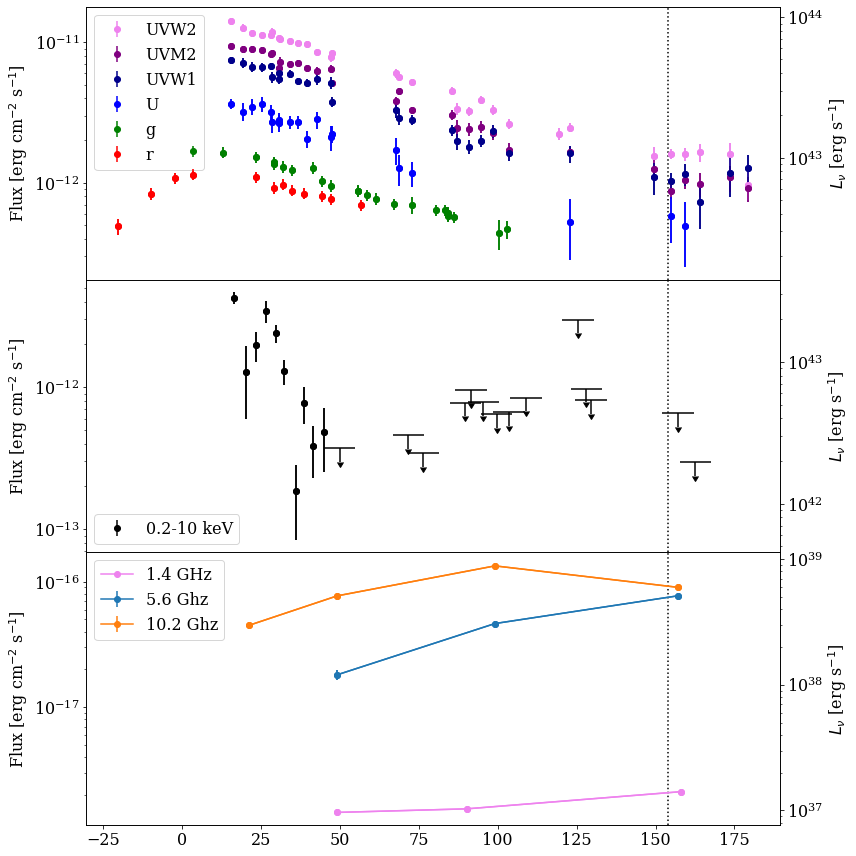

In [14]:
colors = {
    "r.IOO": "r",
    "r.ZTF": "r",
    "r.SEDM": "r",
    "g.ZTF": "g",
    "g.IOO": "g",
    "UVW2": "violet",
    "UVM2": "purple",
    "UVW1": "darkblue",
    "U": "blue",
    
}

fontsize=16

times = []
delta_lum = []

bands = {
    "UVW2": 1928 * u.angstrom,
    "UVM2": 2246 * u.angstrom,
    "UVW1": 2600 * u.angstrom,
    "U": 3465 * u.angstrom,
    "g.ZTF": 464 * u.nm,
    "r.ZTF": 658 * u.nm,
}
            
plt.tight_layout()

plt.figure(figsize=(12, 12))

ax1 = plt.subplot(311)
ax1b = ax1.twinx()

# Plot luminosity

for band in bands:
    if band in bands:
        c = colors[band]
        data = photometry_data[photometry_data["band"] == band]
        data = data[data["lum"] > 0.]
        wl = bands[band].to("m")
        f = (const.c / wl).to("GHz")
        flux = flux_conversion * data["lum"]
        
        for x in ["g", "r"]:
            if x in band:
                band = x
        
        ax1b.errorbar(data["#day_since_peak"], data["lum"], yerr=data["err_lum"], color=c,  fmt='o', label=band)
        ax1.errorbar(data["#day_since_peak"], flux, yerr=flux_conversion *data["err_lum"], color=c,  fmt='o', label=band)

ax1.set_ylabel(r"Flux [erg cm$^{-2}$ s$^{-1}$]", fontsize=fontsize)
ax1b.set_ylabel(r"$L_{\nu}$ [erg s$^{-1}$]", fontsize=fontsize)
ax1.legend(fontsize=fontsize)
ax1.set_yscale("log")
ax1b.set_yscale("log")
ax1.axvline(t_neutrino.mjd - t_peak_mjd.mjd, color="k", linestyle=":", label="IC191001A")
ax1.tick_params(axis='both', which='major', labelsize=fontsize)
ax1b.tick_params(axis='both', which='major', labelsize=fontsize)

ax2 = plt.subplot(312, sharex=ax1)
ax2b = ax2.twinx()

ax2.errorbar(xray_data["#MJD"]-t_peak_mjd.mjd, xray_data["flux"], yerr=xray_data["flux_err"],  fmt='o', label="0.2-10 keV", color="k")
ax2b.errorbar(xray_data["#MJD"]-t_peak_mjd.mjd, xray_data["flux"]/flux_conversion, yerr=xray_data["flux_err"]/flux_conversion,  fmt='o', color="k")
ax2.errorbar(xray_ul_data["#MJD"]-t_peak_mjd.mjd, xray_ul_data["flux"], yerr=0.2*xray_ul_data["flux"], xerr=5., uplims=True, fmt=' ', color="k")
# ax3b.errorbar(xray_data["#MJD"]-t_peak_mjd.mjd, 10.**xray_data["log_lum"], yerr=10.**xray_data["log_lum_err"], label="0.2-10 keV",  fmt='o',)


ax2.set_ylabel(r"Flux [erg cm$^{-2}$ s$^{-1}$]", fontsize=fontsize)
ax2b.set_ylabel(r"$L_{\nu}$ [erg s$^{-1}$]", fontsize=fontsize)
ax2.legend(fontsize=fontsize)
ax2.set_yscale("log")
ax2b.set_yscale("log")
ax2.axvline(t_neutrino.mjd - t_peak_mjd.mjd, color="k", linestyle=":", label="IC191001A")
ax2.tick_params(axis='both', which='major', labelsize=fontsize)
ax2b.tick_params(axis='both', which='major', labelsize=fontsize)

ax3 = plt.subplot(313, sharex=ax1)
ax3b = ax3.twinx()

ax3.plot(meerkat_data["#mjd"] - t_peak_mjd.mjd, convert_radio(meerkat_data["flux_mJy"], 1.4), marker="o", color="violet", label="1.4 GHz")
ax3b.plot(meerkat_data["#mjd"] - t_peak_mjd.mjd, convert_radio(meerkat_data["flux_mJy"], 1.4)/flux_conversion, marker="o", color="violet", label="1.4 GHz")

for frequency in [5.6, 10.2]:
    data = vla_data[abs(vla_data["frequency"] - frequency) < 0.5]
    data = data.sort_values("mjd")
    ax3.errorbar(data["mjd"]- t_peak_mjd.mjd, convert_radio(data["flux"], frequency),  yerr=convert_radio(data["flux_err"], frequency), marker="o", label="{0} Ghz".format(frequency))
    ax3b.errorbar(data["mjd"]- t_peak_mjd.mjd, convert_radio(data["flux"], frequency)/flux_conversion,  yerr=convert_radio(data["flux_err"], frequency)/flux_conversion, marker="o", label="{0} Ghz".format(frequency))

ax3.set_ylabel(r"Flux [erg cm$^{-2}$ s$^{-1}$]", fontsize=fontsize)
ax3b.set_ylabel(r"$L_{\nu}$ [erg s$^{-1}$]", fontsize=fontsize)
ax3.legend(fontsize=fontsize)
ax3.set_yscale("log")
ax3b.set_yscale("log")
ax3.axvline(t_neutrino.mjd - t_peak_mjd.mjd, color="k", linestyle=":", label="IC191001A")
ax3.tick_params(axis='both', which='major', labelsize=fontsize)
ax3b.tick_params(axis='both', which='major', labelsize=fontsize)

# ax2 = plt.subplot2grid((4, 1), (3, 0), colspan=3, rowspan=1, sharex=ax1)
# ax2.scatter(index_times, photon_index)
# ax2.set_ylabel(r"$\frac{d(Log(\nu L_{\nu}))}{d(Log(f))}$", fontsize=12)
# plt.axhline(2.0, color="k", linestyle=":")

plt.tight_layout()
plt.subplots_adjust(hspace=.0)
ax2.set_xlabel("Days since peak", fontsize=fontsize)
plt.savefig("plots/lightcurve.pdf")